In [1]:
import numpy as np 
import pickle as pkl
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
from utils import compute_mean_std

In [3]:
model_results = np.load("../simulations/results/results.npz")

In [4]:
with open("../interpretation/relevance_array_so3net_2B_3B_methane_cut_5.6081.pkl", "rb") as f:
    interpretation = pkl.load(f)

0  nan values
(7714, 2)


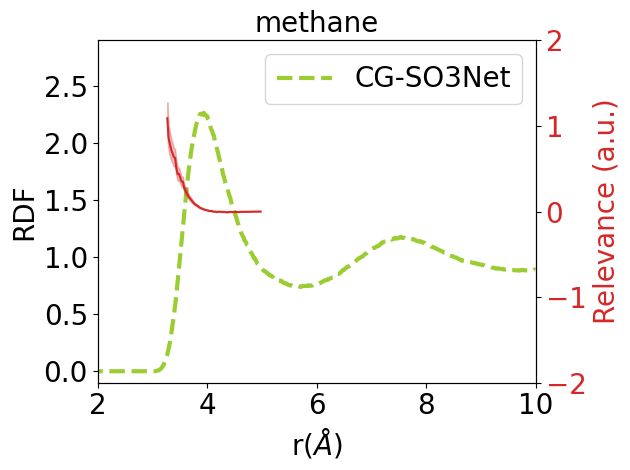

In [5]:
fig, ax = plt.subplots()

ax.plot(model_results["radii"]*10, model_results["gr"], c="yellowgreen", linestyle="--",lw=3,  label=f"CG-SO3Net")
ax2 = ax.twinx()
rel_dist = deepcopy(interpretation[2][:, :2])


rel_dist[:, 0] *= 1e-3
nan_vals = np.isnan(rel_dist[:, 0])
print(np.sum(nan_vals), " nan values")
print(rel_dist.shape)
mean,std,edges = compute_mean_std(rel_dist[~nan_vals])
ax2.plot(edges,mean,color="tab:red")
ax2.fill_between(edges,np.ravel(mean-std),np.ravel(mean+std),alpha=0.3,color="tab:red")

ax2.set_ylabel('Relevance (a.u.)',color="tab:red",fontsize=20) #+r'$\cdot 10^{3}$'


ax2.tick_params(axis='y',labelcolor="tab:red")
ax2.tick_params(axis='both',labelsize=20)

ax2.set_ylim([-2, 2])

ax.set_xlim([2, 10])
ax.set_ylim([-0.1, 2.9])

ax.legend(fontsize=20)
ax.tick_params(axis='both',labelsize=20)
ax.xaxis.get_offset_text().set_fontsize(20)
ax.set_title("methane", fontsize=20)
ax.set_xlabel(r"r($\AA$)", fontsize=20)
ax.set_ylabel("RDF", fontsize=20)
plt.tight_layout()
plt.savefig("../interpretation/results.png")
